In [1]:
from spectral_cube import SpectralCube
from pvextractor import extract_pv_slice, Path
#import pylab as pl
import numpy as np
from astropy.visualization import quantity_support
from astropy import units as u
from astropy import wcs
from matplotlib.colors import LogNorm
from astropy.visualization.stretch import SinhStretch
from astropy.visualization import simple_norm
import matplotlib.pyplot as plt
from astropy.utils import data

In [ ]:
ls /home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/fitsImages/

In [ ]:
ls /home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/fitsImages/

In [ ]:
ls /home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/

In [ ]:
ls /home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/

## Read in Data and Load into Memory

In [2]:
a_fitsnames = ['/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/fitsImages/g5a.12CO.spw17.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/fitsImages/g5a.Ha.spw19.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/fitsImages/g5a.HC3N.spw21.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/fitsImages/g5a.H2CO.spw23.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/fitsImages/g5a.H2CO.spw25.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/fitsImages/g5a.SiO.spw27.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/fitsImages/g5a.13CO.spw29.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/fitsImages/g5a.C18O.spw31.fits' 
               ]

b_fitsnames = ['/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/fitsImages/g5b.12CO.spw17.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/fitsImages/g5b.Ha.spw19.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/fitsImages/g5b.HC3N.spw21.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/fitsImages/g5b.H2CO.spw23.fits',  
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/fitsImages/g5b.H2CO.spw25.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/fitsImages/g5b.SiO.spw27.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/fitsImages/g5b.13CO.spw29.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/fitsImages/g5b.C18O.spw31.fits'
               ]

In [3]:
'''
a_fixednames =['/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.12CO.spw17.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.Ha.spw19.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.CH3OH.spw21.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw23.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw25.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.SiO.spw27.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.13CO.spw29.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.C18O.spw31.fits' 
               ]

b_fixednames = ['/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.12CO.spw17.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.Ha.spw19.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.CH3OH.spw21.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.H2CO.spw23.fits',  
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.H2CO.spw25.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.SiO.spw27.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.13CO.spw29.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.C18O.spw31.fits'
               ]
'''
####

"\na_fixednames = ['/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.12CO.spw17.fits', \n               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.Ha.spw19.fits', \n               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.CH3OH.spw21.fits',\n               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw23.fits', \n               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw25.fits', \n               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.SiO.spw27.fits', \n               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.13CO.spw29.fits', \n               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862

In [4]:
def spec_cube(name):
    cube = SpectralCube.read(name)
    cube.allow_huge_operations=True
    cube = cube.with_spectral_unit(u.km / u.s, velocity_convention='radio')
    cube = cube.to(u.K)
    return cube

def spec_mcube(name):
    cube = SpectralCube.read(name)
    cube.allow_huge_operations=True
    cube = cube.with_spectral_unit(u.GHz, velocity_convention='radio', rest_value=218.44005 * u.GHz)
    cube = cube.with_spectral_unit(u.km / u.s, velocity_convention='radio')
    cube = cube.to(u.K)
    return cube

In [5]:
a_cube17 = spec_cube(a_fitsnames[0])
a_cube17 = np.flip(a_cube17, 0)
#a_cube19 = spec_cube(a_fitsnames[1])
a_cube21 = spec_mcube(a_fitsnames[2])
a_cube23 = spec_cube(a_fitsnames[3])
a_cube25 = spec_cube(a_fitsnames[4])
a_cube27 = spec_cube(a_fitsnames[5])
a_cube29 = spec_cube(a_fitsnames[6])
a_cube31 = spec_cube(a_fitsnames[7])

In [6]:
b_cube17 = spec_cube(b_fitsnames[0])
b_cube17 = np.flip(b_cube17, 0)
#b_cube19 = spec_cube(b_fitsnames[1])
b_cube21 = spec_mcube(b_fitsnames[2])
b_cube23 = spec_cube(b_fitsnames[3])
b_cube25 = spec_cube(b_fitsnames[4])
b_cube27 = spec_cube(b_fitsnames[5])
b_cube29 = spec_cube(b_fitsnames[6])
b_cube31 = spec_cube(b_fitsnames[7])

In [10]:
#a_cube21 = spec_mcube(a_fitsnames[2])
#b_cube21 = spec_mcube(b_fitsnames[2])


## Make Example PV Diagrams and Moment Maps to Identify Issues

/home/savannahgramze/.local/lib/python3.9/site-packages/pvextractor-0.3.dev33+gac7db5e-py3.9.egg/pvextractor/geometry/path.py:262: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patches.append(MPLPolygon(list(zip(poly.x, poly.y)), **kwargs))


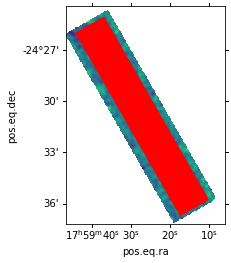

In [7]:
apath = Path([(29, 248),(160,19)], width=40.)
#Path([(2,18),(155,18)], width = 25.)
ax = plt.subplot(111, projection=a_cube17.wcs.celestial)
ax.imshow(a_cube17[25].value)
apath.show_on_axis(ax, spacing=1, color='r')

/home/savannahgramze/.local/lib/python3.9/site-packages/pvextractor-0.3.dev33+gac7db5e-py3.9.egg/pvextractor/geometry/path.py:262: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patches.append(MPLPolygon(list(zip(poly.x, poly.y)), **kwargs))


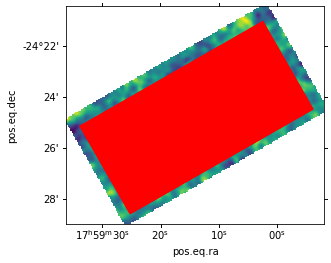

In [8]:
bpath = Path([(30, 42),(175,125)], width=80.)
ax = plt.subplot(111, projection=b_cube21.wcs.celestial)
ax.imshow(b_cube21[25].value)
bpath.show_on_axis(ax, spacing=1, color='r')

In [9]:
def plot_pv(cube, path, aspect):
    pvdiagram = extract_pv_slice(cube=cube, path=path, spacing=1)
    
    plt.figure(figsize=(12,6))

    ax = plt.subplot(111, projection=wcs.WCS(pvdiagram.header))
    im = ax.imshow(pvdiagram.data)
    cb = plt.colorbar(mappable=im)

    ww = wcs.WCS(pvdiagram.header)
    
    norm = simple_norm(pvdiagram.data, 'asinh')

    ax = plt.subplot(111, projection=ww)
    im = ax.imshow(pvdiagram.data, norm=norm, cmap='afmhot')#, norm=LogNorm())
    #im = ax.imshow(pvdiagram.data, norm=norm, cmap='plasma')#, norm=LogNorm())
    cb = plt.colorbar(mappable=im)
    #cb.set_label("Brightness Temperature [K]")
    cb.set_label(cube.unit)
    ax.set_aspect(aspect)

    ax0 = ax.coords[0]
    ax0.set_format_unit(u.arcmin)
    ax1 = ax.coords[1]
    ax1.set_format_unit(u.km/u.s)

    ax.set_ylabel("Velocity [km/s]")
    ax.set_xlabel("Offset [arcmin]")

In [13]:
#plot_pv(a_cube17,apath,0.2)

In [15]:
#plot_pv(a_cube21,apath,0.5)

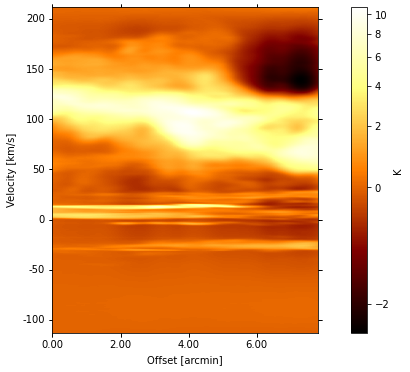

In [23]:
plot_pv(b_cube17,bpath,0.1)

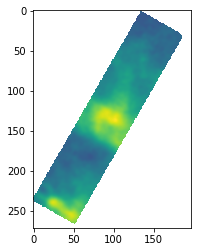

In [36]:
a_cube17.moment0(axis=0).quicklook()  

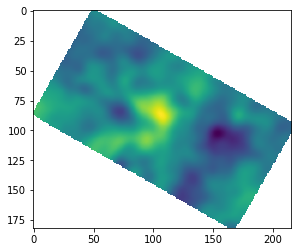

In [18]:
b_cube17.moment0(axis=0).quicklook()  

## Subtract Off Bottom 10 Percentile of Cubes

In [10]:
def per10_subtraction(cube):
    return per_subtraction(cube, 10)

def per_subtraction(cube, per):
    percentile_10 = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio').percentile(per,axis=(1,2))
    percentile_10.quicklook()
    per10_subtracted = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio') - percentile_10[:,None,None]
    return per10_subtracted

#### Field A 

In [16]:
#a_cube17.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.12CO.spw17.fits')

In [20]:
#percentile_21_10 = a_cube21.with_spectral_unit(u.km/u.s, velocity_convention='radio').percentile(10,axis=(1,2))
#percentile_21_10.quicklook() # subtract off
#per10_21_subtracted = a_cube21.with_spectral_unit(u.km/u.s, velocity_convention='radio') - percentile_21_10[:,None,None]

In [21]:
#per10_21_subtracted.mad_std()

In [22]:
#plot_pv(per10_21_subtracted,apath,0.5)

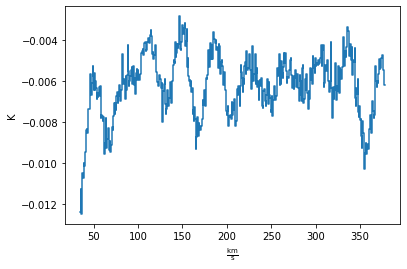

In [39]:
per10sub_21 = per_subtraction(a_cube21, 10)


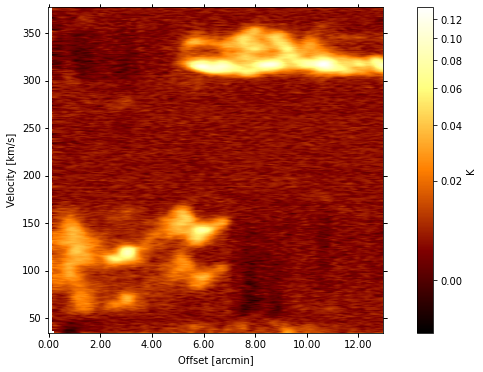

In [51]:
plot_pv(per10sub_21,apath,0.5)
plt.savefig('plots/pvdiagram_CH3OH.png')

In [55]:
per10sub_21.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.CH3OH.spw21.fits')

In [24]:
#plot_pv(a_cube21,apath,0.5)

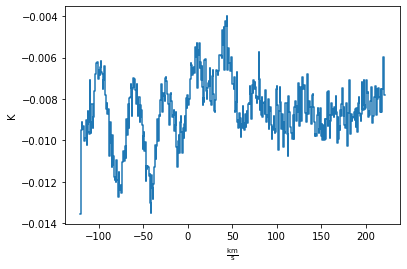

In [42]:
per5sub_23 = per_subtraction(a_cube23, 5)
#per10sub_23 = per_subtraction(a_cube23, 10)

#plot_pv(per10sub_17,apath,0.1)

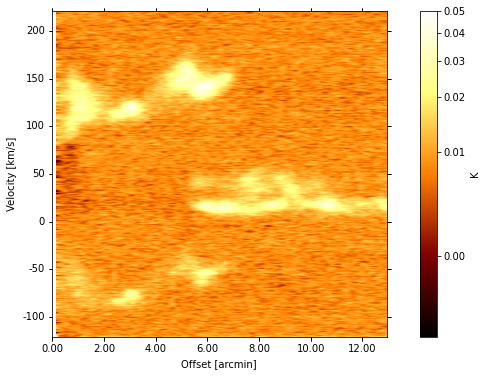

In [52]:
plot_pv(per5sub_23, apath, 0.5)
plt.savefig('plots/pvdiagram_H2CO_spw23.png')

In [57]:
per5sub_23.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw23.fits')

In [27]:
#plot_pv(a_cube23, apath, 0.5)

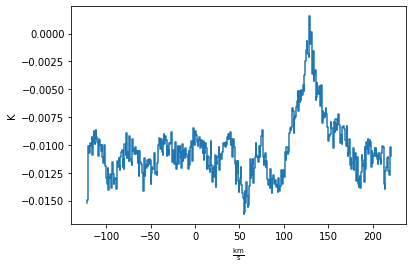

In [45]:
per10sub_25 = per_subtraction(a_cube25, 1)

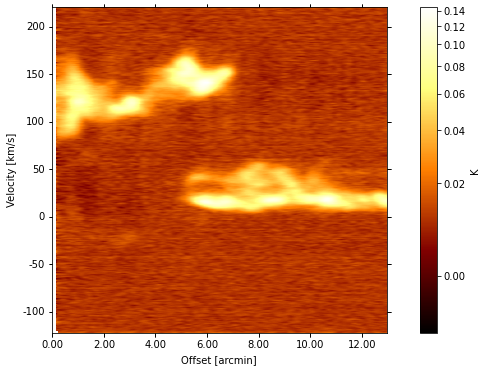

In [53]:
plot_pv(per10sub_25, apath, 0.5)
plt.savefig('plots/pvdiagram_H2CO_spw25.png')

In [59]:
per10sub_25.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw25.fits')

In [30]:
#plot_pv(a_cube25, apath, 0.5)

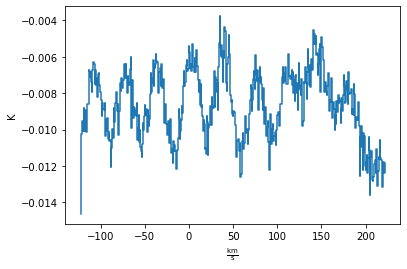

In [22]:
per10sub_27 = per_subtraction(a_cube27, 5)

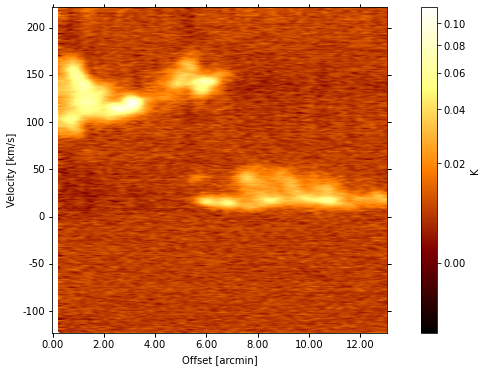

In [23]:
plot_pv(per10sub_27, apath, 0.5)
#plt.savefig('plots/pvdiagram_SiO.png')

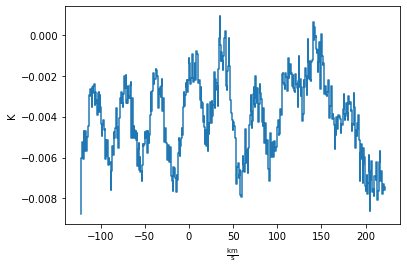

In [26]:
per10sub_27dot = per_subtraction(a_cube27, 20)

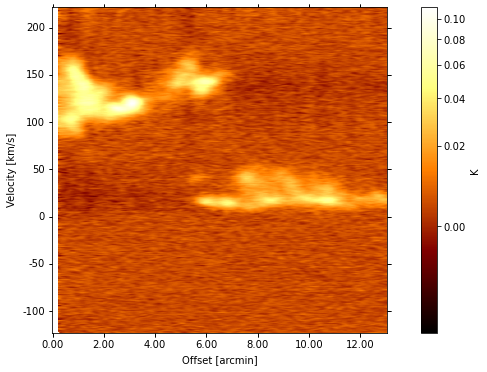

In [27]:
plot_pv(per10sub_27dot, apath, 0.5)


In [28]:
per10sub_27.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.SiO.spw27.fits')#,overwrite=True)

In [33]:
#plot_pv(a_cube27, apath, 0.5)

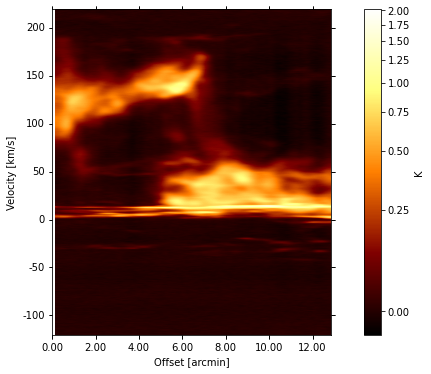

In [61]:
plot_pv(a_cube29, apath, 0.3)
plt.savefig('plots/pvdiagram_13CO.pdf')
plt.savefig('plots/pvdiagram_13CO.png')

In [17]:
#a_cube29.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.13CO.spw29.fits')

In [34]:
#plot_pv(a_cube31, apath, 0.2)

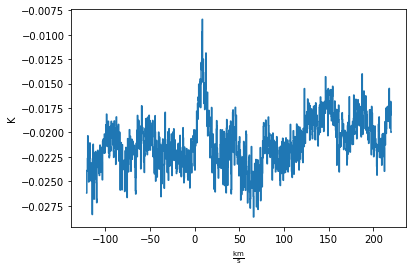

In [55]:
per10sub_31 = per_subtraction(a_cube31, 1)

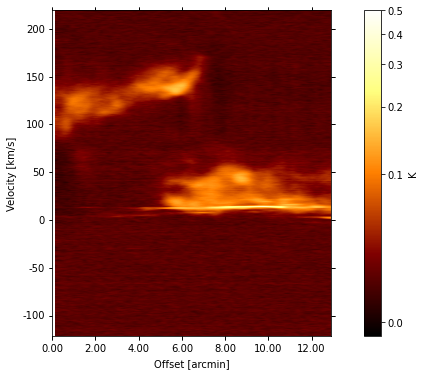

In [59]:
plot_pv(per10sub_31, apath, 0.3)
plt.savefig('plots/pvdiagram_C18O.pdf')
plt.savefig('plots/pvdiagram_C18O.png')

In [62]:
per10sub_31.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.C18O.spw31.fits')

#### Field B

In [7]:
#b_cube17.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.12CO.spw17.fits')

In [37]:
#plot_pv(b_cube21,bpath,0.4)

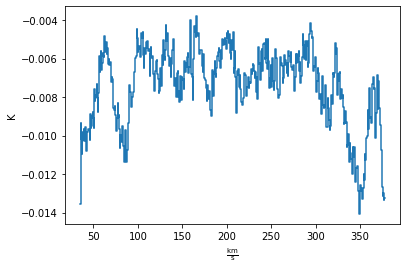

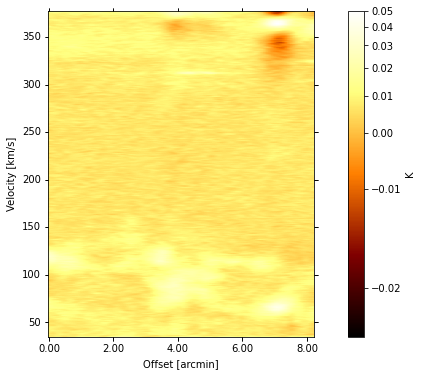

In [38]:
per10sub_21b = per_subtraction(b_cube21, 10)
plot_pv(per10sub_21b,bpath,0.4)

In [63]:
per10sub_21b.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.CH3OH.spw21.fits')

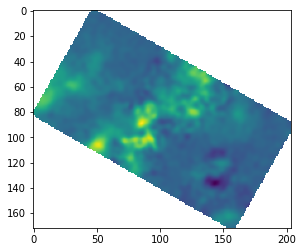

In [39]:
per10sub_21b.moment0().quicklook()

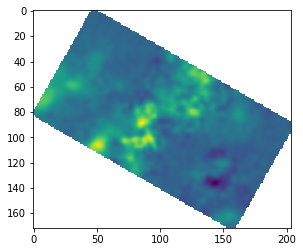

In [40]:
b_cube21.moment0().quicklook()

In [41]:
#plot_pv(b_cube23,bpath,0.4)

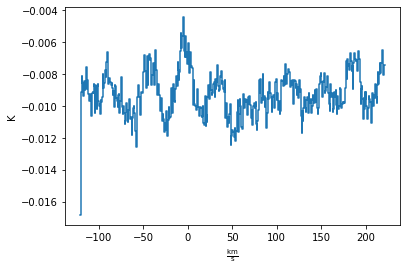

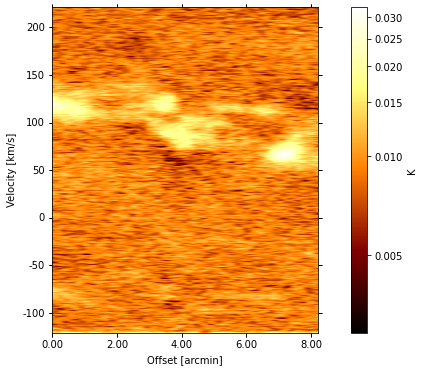

In [42]:
per10sub_23b = per_subtraction(b_cube23, 5)
plot_pv(per10sub_23b,bpath,0.4)

In [64]:
per10sub_23b.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.H2CO.spw23.fits')

In [43]:
#plot_pv(b_cube25,bpath,0.4)

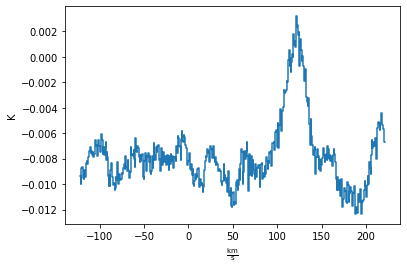

In [44]:
#per10sub_25b = per_subtraction(b_cube25, 10)

per10sub_25b = per_subtraction(b_cube25, 5)


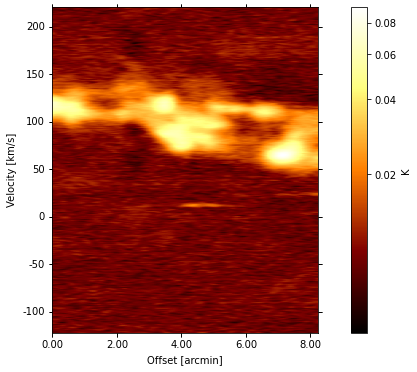

In [45]:
plot_pv(per10sub_25b,bpath,0.4)

In [65]:
per10sub_25b.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.H2CO.spw25.fits')

In [46]:
#plot_pv(b_cube27,bpath,0.4)

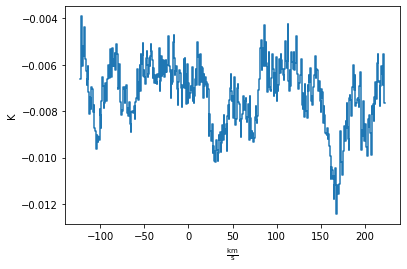

In [47]:
per10sub_27b = per_subtraction(b_cube27, 10)


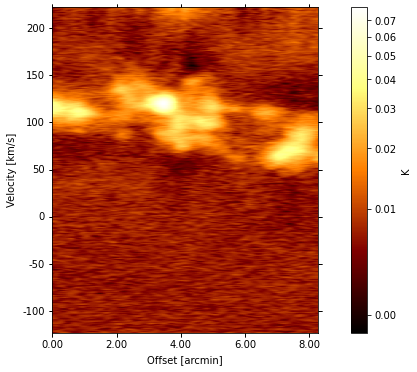

In [48]:
plot_pv(per10sub_27b,bpath,0.4)

In [66]:
per10sub_27b.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.SiO.spw27.fits')

In [49]:
#plot_pv(b_cube29,bpath,0.2)

In [50]:
#plot_pv(b_cube31,bpath,0.2)

In [8]:
#b_cube29.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.13CO.spw29.fits')

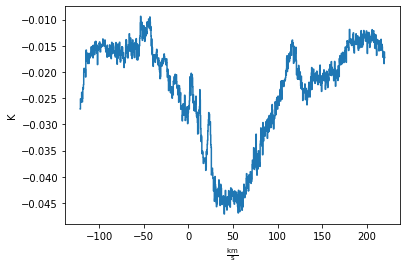

In [51]:
per10sub_31b = per_subtraction(b_cube31, 5)


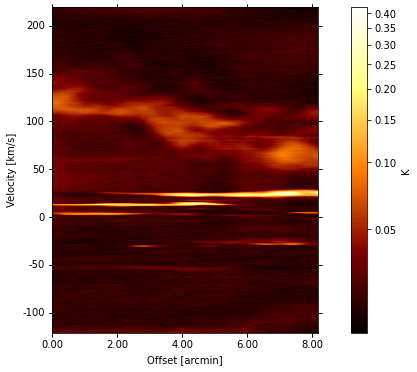

In [52]:
plot_pv(per10sub_31b,bpath,0.2)

In [67]:
per10sub_31b.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.C18O.spw31.fits')